In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Replicate "right panel" experiment from appendix with 4 losses

In [154]:
def simult(x):
    return np.array([x[1:].sum(), x[2:].sum() - x[0], x[-1] - x[:2].sum(), -x[:-1].sum()])

In [155]:
def half_norm_grad(x):
    return np.array([3*x[0] + 2*x[1] - 2*x[3],
                     2*x[0] + 3*x[1] + 2*x[2],
                     2*x[1] + 3*x[2] + 2*x[3],
                     (-2)*x[0] + 2*x[2] + 3*x[3]])

In [162]:
def get_losses(x):
    return np.array([x[0]*x[1:].sum(),
                     x[1] * (x[2:].sum() - x[0]),
                     x[2] * (x[3] - x[:2].sum()),
                     x[3] * (-x[:-1].sum())])

In [164]:
antisymm = np.array([[0, 1, 1, 1],
                     [-1, 0, 1, 1],
                     [-1, -1, 0, 1],
                     [-1, -1, -1, 0]])

In [185]:
def has_converged(losses):
    last_losses = np.array(losses[-10:])
    for i in range(x.shape[0]):
        cur_mean = last_losses[:, i].mean()
        if cur_mean > 0.1:
            return False
    return True

# Simult grad descent

In [186]:
x = np.random.normal(size=4)
print(x)

[-0.82357031  0.25542281 -0.84583361 -0.47173342]


In [40]:
iters = 10000
lr = 0.01
diffs = []
for it in range(iters):
    x_new = x - lr * simult(x)
    diff = np.linalg.norm(x_new - x)
    diffs.append(diff)
    x = x_new

Diverges!

# SGA with convergence criterion

In [194]:
x = np.random.normal(size=4)
print(x)

[ 0.64486513  0.68124375  1.13157652  1.24513039]


In [195]:
iters = 10000
lr = 0.0001
diffs = []
losses = []
for it in range(iters):
    grad_new = (np.eye(antisymm.shape[0]) + antisymm.T) @ simult(x)
    x_new = x - lr * grad_new
    diff = np.linalg.norm(x_new - x)
    diffs.append(diff)
    losses.append(get_losses(x))
    x = x_new
    if has_converged(losses):
        print(f'Converged early at iteration {it+1}')
        break

Converged early at iteration 3984


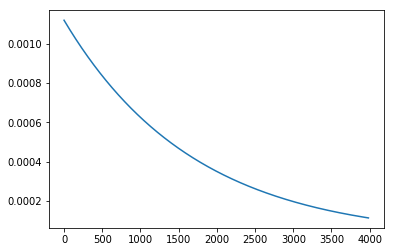

In [196]:
plt.plot(diffs)

# Now with alignment

grad = grad of 1/2 norm of simult wrt player params

lam = 1/d (simult, grad) (A^T simult, grad) + eps, d=4, eps=0.1

In [151]:
x = np.random.normal(size=4)
print(x)

[ 0.33162797 -1.58073957 -1.51677535 -1.22340763]


In [152]:
iters = 10000
lr = 0.0001
eps = 0.1
diffs = []
for it in range(iters):
    lam_expr = (simult(x) @ half_norm_grad(x)) * ((antisymm.T @ simult(x)) @ half_norm_grad(x)) / x.shape[0] + eps
    lam = 1 if lam_expr >= 0 else -1
    grad_new = (np.eye(antisymm.shape[0]) + lam * antisymm.T) @ simult(x)
    x_new = x - lr * grad_new
    diff = np.linalg.norm(x_new - x)
    diffs.append(diff)
    x = x_new

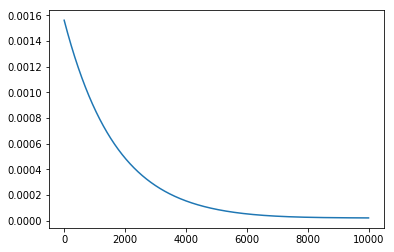

In [153]:
plt.plot(diffs)

Here lam_expr is almost exactly = eps and so the behavior is the same